In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_image(image, title=None, vmin=0, vmax=255):
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(title) 

### Count coins

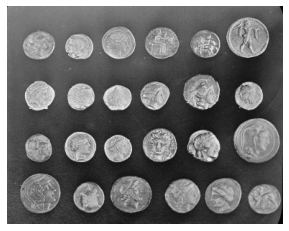

In [2]:
#โหลดภาพ
from skimage import data
img_coins = data.coins()

show_image(img_coins)

**Sobel**

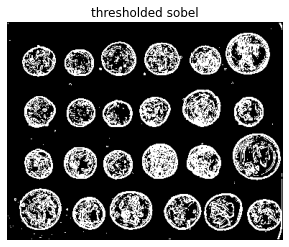

In [3]:
#ลองใช้ sobel
from skimage.filters import sobel

img_sobel = sobel(img_coins)
img_sobel_bw = img_sobel > img_sobel.max()*0.1
show_image(img_sobel_bw, 'thresholded sobel', vmin=0, vmax=1)

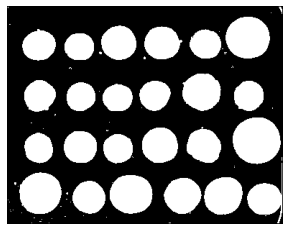

In [4]:
#ถมรูภายในเหรียญ ให้เป็น foreground pixels
from scipy import ndimage as ndi

img_sobel_coins = ndi.binary_fill_holes(img_sobel_bw)
show_image(img_sobel_coins, vmin=0, vmax=1)

73


(-0.5, 383.5, 302.5, -0.5)

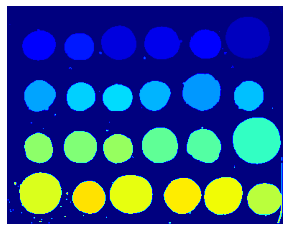

In [5]:
#ทำ connected component analysis
from skimage.measure import label

img_label, N = label(img_sobel_coins, return_num=True)
print(N)

#แสดง components
plt.imshow(img_label, cmap='jet')
plt.axis('off')

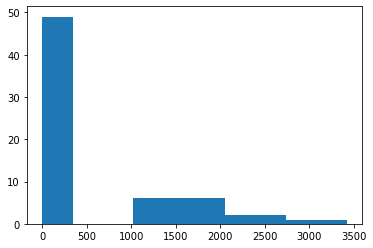

In [6]:
#ลองดู histogram ของขนาด components
component_size = [(img_label==i).sum() for i in range(1,N+1)]
plt.hist(component_size, bins=10); 

In [7]:
#คำนวณ threshold โดยใช้ Otsu's method
from skimage.filters import threshold_otsu
thres = threshold_otsu(np.array(component_size).reshape(1,-1))
print('Otsu threshold =',thres)

Otsu threshold = 22


In [8]:
#นับจำนวน component ที่เกิน threshold
number_of_coins = len([size for size in component_size if size > thres])
print('Number of coins =', number_of_coins)

Number of coins = 24


**Canny**

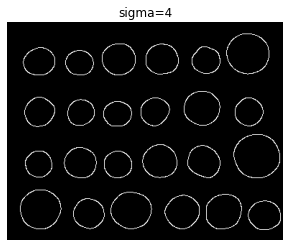

In [12]:
#ลองใช้ canny edge detector
from skimage.feature import canny

sigma = 4
img_canny = canny(img_coins, sigma=sigma, low_threshold=25.5, high_threshold=51)

show_image(img_canny, 'sigma='+str(sigma), vmin=0, vmax=1)

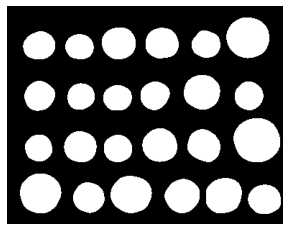

In [13]:
#ถมรูภายในเหรียญ ให้เป็น foreground pixels
from scipy import ndimage as ndi

img_canny_coins = ndi.binary_fill_holes(img_canny)
show_image(img_canny_coins, vmin=0, vmax=1)

Number of coins = 24


(-0.5, 383.5, 302.5, -0.5)

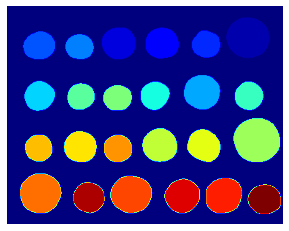

In [14]:
#นับจำนวนเหรียญ
from skimage.measure import label

img_label, N = label(img_canny_coins, return_num=True)
print('Number of coins =',N)

#แสดง components
plt.imshow(img_label, cmap='jet')
plt.axis('off')